# Playgrounds in neighborhoods (near you!)

**The best neighborhood for most accessibile to recreation will be determined by the most number of playgrounds in the neighborhood.**

![Southpark](https://media.giphy.com/media/l2Sq0RLawIPOecOxW/giphy.gif)

In [58]:
#importing necessary 
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
%matplotlib inline

In [59]:
#reading in csv
data = pd.read_csv("playgrounds.csv")

#### This is what we're working with. 

In [60]:
data.head() 
#displays the first 5 rows of the dataset. 
#Need to get the number of playgrounds in each neighborhood

,_id,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,2,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,3,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,4,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,5,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


##### *(internal thoughts)* I want to count the number of parks in each neighborhood. We look at name of park and the neighborhood its in. How do I perform this?

#### We'll only need to look at the "name" of the playground and the "neighborhood" name.

In [61]:
data.pivot(columns = "neighborhood", values = "name")

neighborhood,Allegheny Center,Allentown,Banksville,Bedford Dwellings,Beechview,Beltzhoover,Bloomfield,Bluff,Bon Air,Brighton Heights,...,Strip District,Swisshelm Park,Terrace Village,Troy Hill,Upper Hill,Upper Lawrenceville,West End,West Oakland,Westwood,Windgap
0,NaN,NaN,NaN,NaN,Able Long Playground,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Alton Playground,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Ammon Playground,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Duncan Park Playground,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,McKinley Upper Playground,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data.pivot(columns = "neighborhood", values = "name").count()

neighborhood
Allegheny Center       4
Allentown              1
Banksville             1
Bedford Dwellings      1
Beechview              5
                      ..
Upper Lawrenceville    3
West End               1
West Oakland           1
Westwood               1
Windgap                1
Length: 68, dtype: int64

#### Sums the number of playgrounds each neighborhood has. 
### HOW?
#### The count method adds up each row of playground under each column of neighborhood.
#### Too many neighborhoods that only have one playground. Got to look at the top 30 neighborhoods. 

,playgrounds
neighborhood,
Squirrel Hill South,8
Beechview,5
South Side Slopes,5
Allegheny Center,4
Beltzhoover,4
Highland Park,4
Sheraden,4
Mount Washington,3
Elliott,3


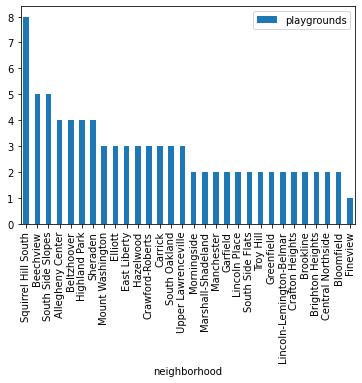

In [63]:
playground = data.pivot(columns = "neighborhood", values = "name").count().sort_values(ascending = False)
playground = playground.to_frame()
#i find out it wasn't a dataframe this whole time :O
playground.rename(columns= {0:'playgrounds'}, inplace= True)
playground.head(30).plot(kind='bar')
playground.head(30)

#### Winner Winner Squirrel Hill South has the most playgrounds...

### Maps are fun...we should look at one

##### Pittsburgh shapefile needed to create a map
##### then we merge our current dataframe with the shapefile

In [64]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
import matplotlib.pyplot as plt
playground_map = neighborhoods.merge(playground, how='left', left_on='hood', right_on='neighborhood')
playground_map[['hood','playgrounds','geometry']].head()

,hood,playgrounds,geometry
0,Point Breeze North,1.0,"POLYGON ((-79.90531 40.45549, -79.90488 40.455..."
1,Squirrel Hill North,1.0,"POLYGON ((-79.92063 40.44423, -79.92052 40.443..."
2,Garfield,2.0,"POLYGON ((-79.93546 40.47257, -79.93530 40.472..."
3,Bedford Dwellings,1.0,"POLYGON ((-79.96601 40.45520, -79.96595 40.454..."
4,Knoxville,NaN,"POLYGON ((-79.98819 40.41852, -79.98824 40.418..."


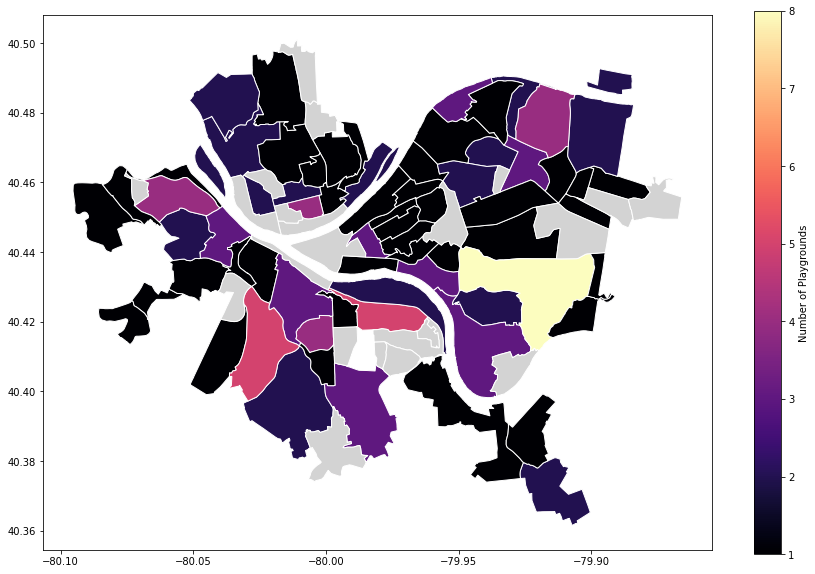

In [65]:
playground_map.plot(column='playgrounds',
                    figsize = (15,10),
                    cmap='magma',
                    edgecolor="white",
                    legend = True,
                    legend_kwds={'label': "Number of Playgrounds"},
                    missing_kwds={"color": "lightgrey"}
                   )

#### The top 4 are Squirrel hill south, Beechview, South side slopes, allegheny center. 
#### The winner by a 3 playground lead is squirrel hill south
#### Though that could be because Squirrel hill south is the largest area neighborhood. 

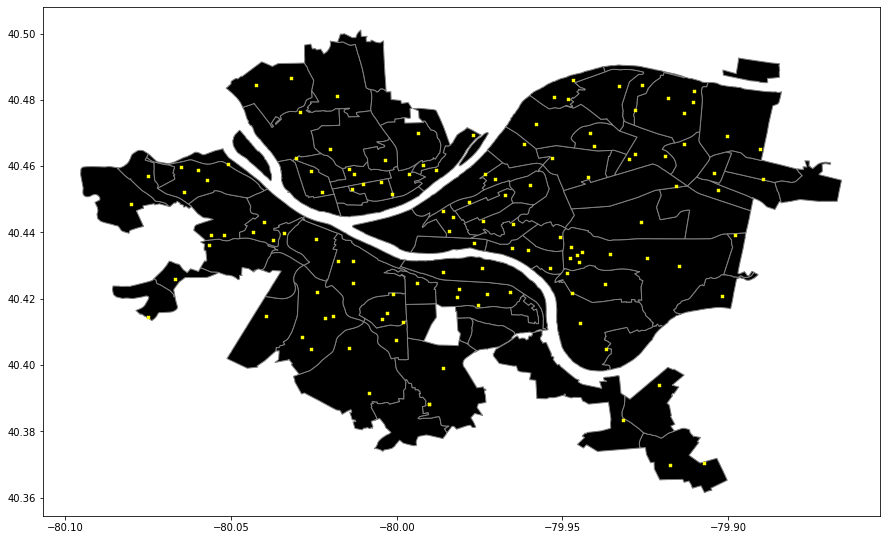

In [66]:
df_geo = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data['longitude'], data['latitude']))
df = GeoDataFrame(data, geometry=df_geo['geometry'])
base = gpd.read_file('Neighborhoods/Neighborhoods_.shp')
df.plot(
                ax=base.plot(figsize=(15, 10),
                color='black',
                edgecolor='grey'),
                figsize=(20, 20),
                marker='X',
                color='yellow',
                markersize=8
        )


<img src="https://s3.amazonaws.com/visit-pittsburgh/CMS/2020-Neighborhood-Map2.jpg"  width="900" height="900">

#### My refle
##### The best neighborhood for most recreational will be determined by the number of playgrounds in the neighborhood is a flawed metric. Squirrel Hill has such a large area so it would make sense that it should have more playgrounds. Taking that in account, it would be best for the resident to live in the location where the cluster of playgrounds are nearby. After looking at the data from different angles, Squirrel Hill south still is my pick because it has the most playgrounds so close to one general area, plus Ben's data frequently showed Squirrel Hill.
##### Squirrel Hill was my personal favorite because my dad took me to a good restaurant there, "NoodleHead." I've been around there more than other neighborhoods of Pittsburgh.